In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Datasets/housing.csv')

dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**CRIM** per capita crime rate by town

**ZN** proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS** proportion of non-retail business acres per town

**CHAS** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX** nitric oxides concentration (parts per 10 million)

**RM** average number of rooms per dwelling

**AGE** proportion of owner-occupied units built prior to 1940

**DIS** weighted distances to five Boston employment centres

**RAD** index of accessibility to radial highways

**TAX** full-value property-tax rate per 10,000usd

**PTRATIO** pupil-teacher ratio by town

**B** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT** % lower status of the population 

In [ ]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1304e83cf8>,
      dtype=object)

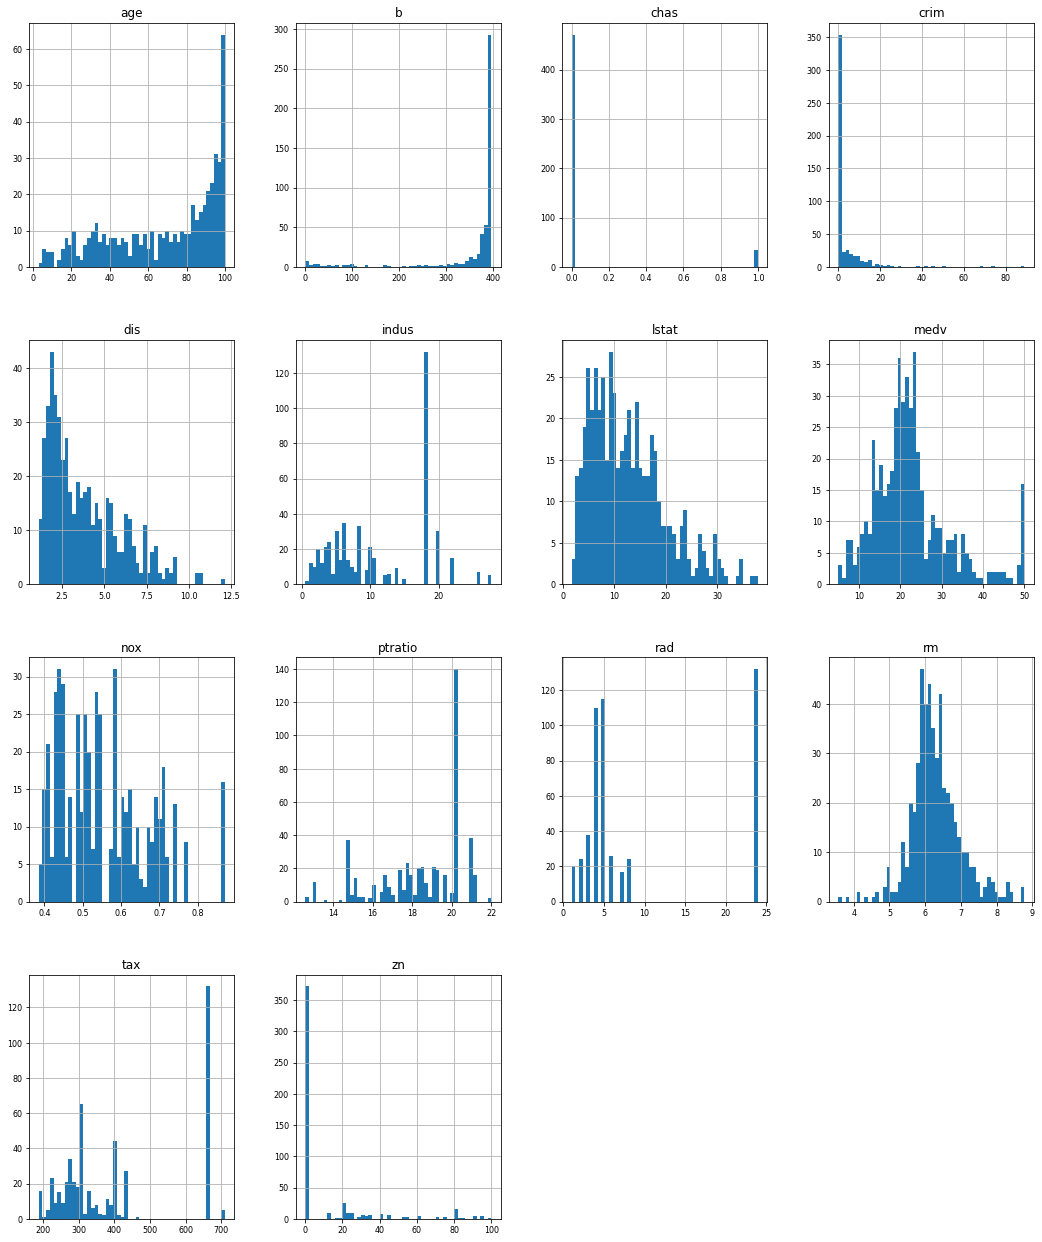

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1304917c88>,
      dtype=object)

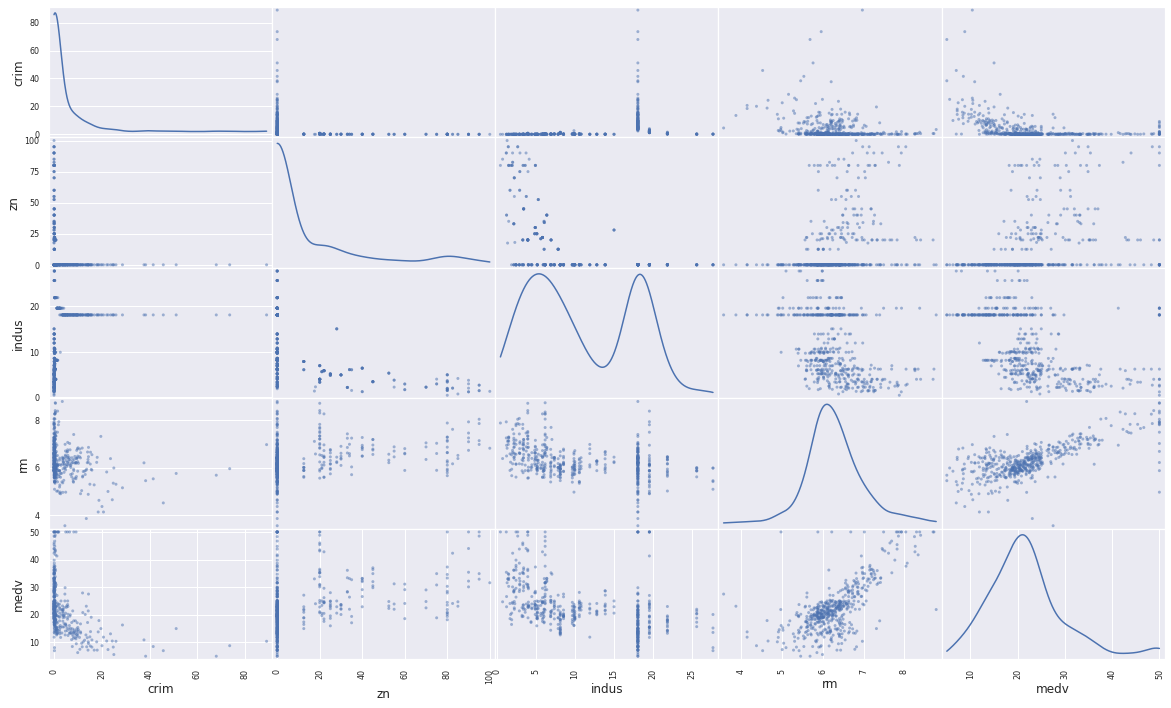

In [ ]:
sns.set()
feat = ['crim','zn','indus','rm', 'medv']
pd.plotting.scatter_matrix(dataset[feat], figsize=(20,12), diagonal='kde')

In [ ]:
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
dataset.corr()['medv'][:-1]

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
Name: medv, dtype: float64

In [ ]:
corr = dataset.corr()

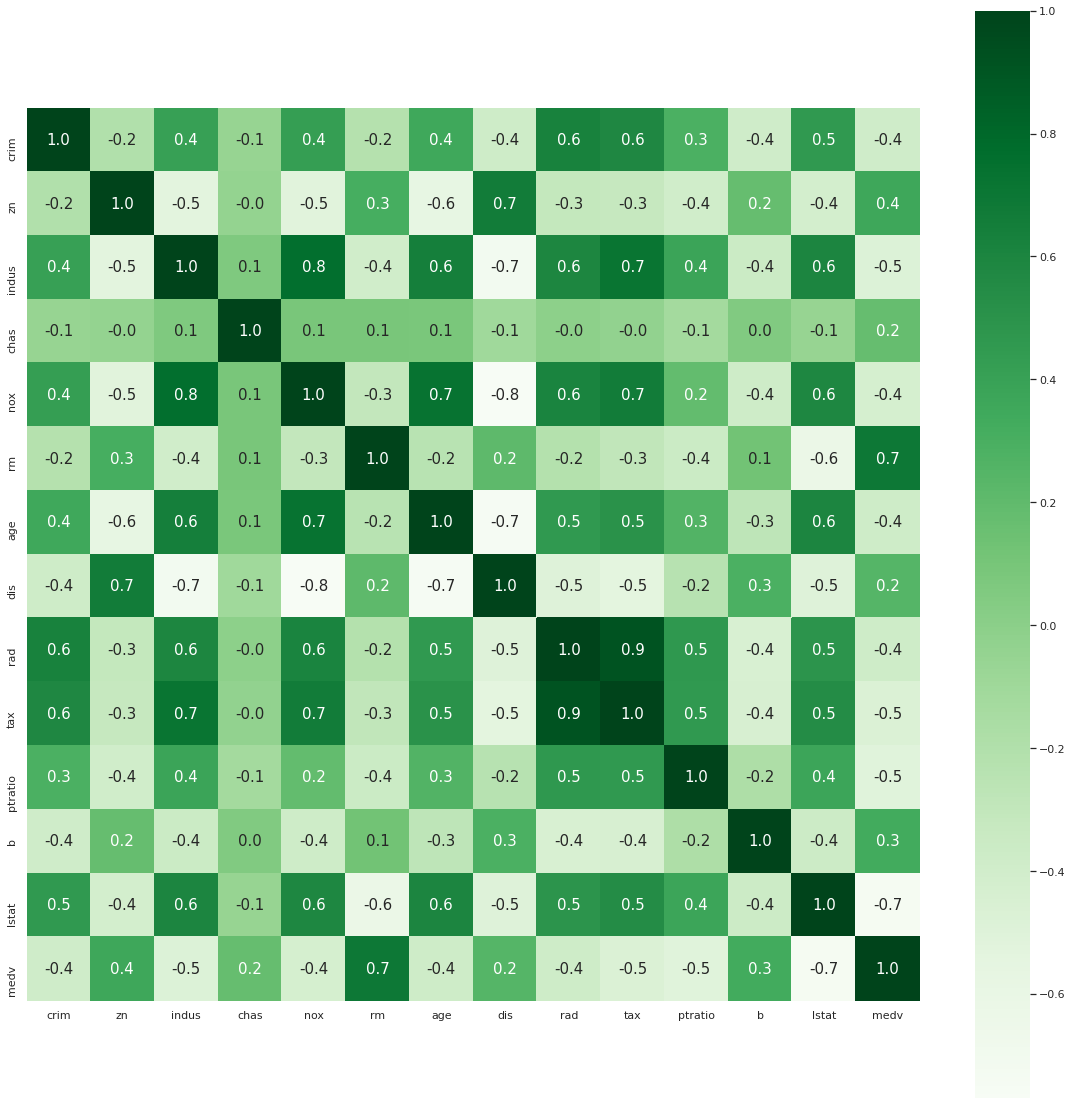

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [ ]:
label = dataset['medv']
features = dataset.drop(['medv'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 34.413968453138494
MAE (Mean Absolute Error) 4.061419182954708
r^2 score 0.6709339839115636
RMSE (Root Mean Squared Error 5.866341999333017


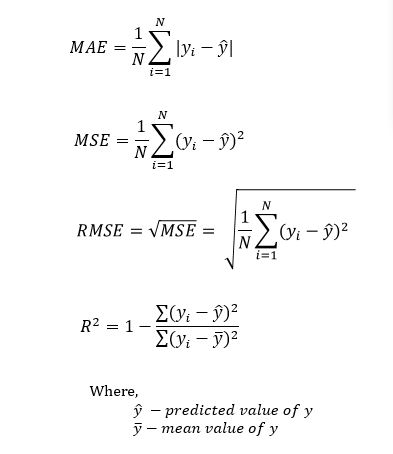

https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

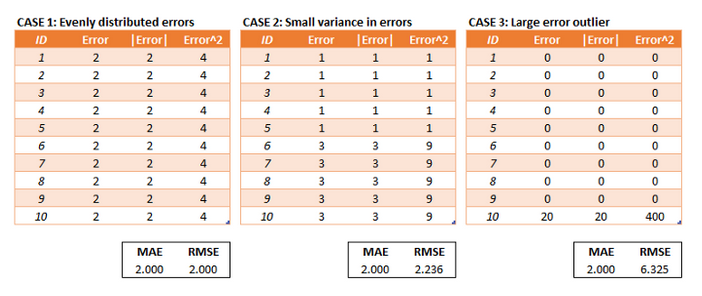

1. Apabila error (perbedaan antara nilai ekspektasi & prediksi) konstan, nilai Mean Absolute Error (MAE) & Root Mean Squared Error (RMSE) sama
2. Apabila terdapat variasi dari error, terlihat ada perbedaan dari MAE & RMSE (**nilai RMSE lebih besar, menunjukan lebih sensitif terhadap perbedaan**)
3. Apabila terdapat nilai yang sungguh besar (**outlier**), RMSE mencatat perbedaannya dengan lebih baik

# Assignment

**Untuk dataset**: Boston Housing, Wine Quality, & Automobile

1. Lakukan preprocessing terhadap data menggunakan:
  - StandardScaler
  - Yeo-Johnson (PowerTransformer)
  - Box-Cox Transformation (PowerTransformer)
  - QuantileTransformer
  - MinMaxScaler
  - MaxAbsScaler
  - RobustScaler

  Dan jelaskan apabila hasil training untuk algoritma LinearRegression untuk masing-masing metode transformasi data dibandingkan!

  Jelaskan juga apabila terdapat metode preprocessing yang tidak dapat digunakan untuk salah satu dataset!

  **Catatan**: Ratio training set: testing set = 75:25, dengan random_state=10

2. Gunakan algoritma berikut dan lakukan percobaan hyperparameter tuning untuk mendapatkan hasil terbaik:
  - Random Forest Regressor
  - XGBoost
  - SVM Regressor
  - KNN Regressor

  Hitung angka r^2 serta RMSE untuk menentukan mana algoritma yang paling baik!

  **Catatan**: Ratio training set: testing set = 75:25, dengan random_state=10